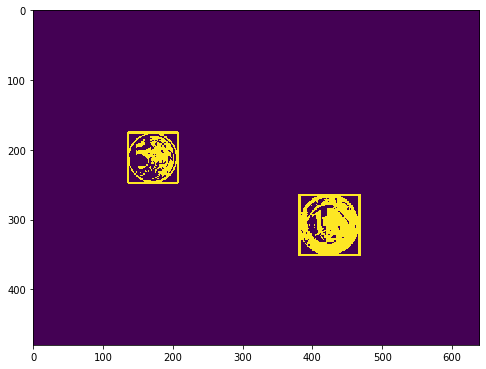

In [30]:
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np




img = cv.imread('moedas_105.jpg')
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

# Binarizacao
img_bin = img.copy()

for lin in range(img.shape[0]):
  for col in range(img.shape[1]):
    if(img.item(lin, col) > 50):
      img_bin.itemset((lin, col),0)
    else: 
      img_bin.itemset((lin, col),255)
    
    
#Extrair os contornos da imagem
contorno, ordem = cv.findContours(img_bin, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)

raio_list = []

for c in contorno:
  #Encontrar o bounding box
  x,y,w,h = cv.boundingRect(c)
  cv.rectangle(img_bin,(x,y),(x+w,y+h),(255,0,0),2)

  #Encontrar o bounding box considerando a rotação do objeto
  area = cv.minAreaRect(c)
  box = cv.boxPoints(area)  # calcular as coordenadas do obj
  box = np.int0(box)        # normalizar as coordenadas -> inteiros
  #cv.drawContours(img1,[box],0,(0,0,255),2)

  #Encontrar o Círculo Mínimo
  (x,y), raio = cv.minEnclosingCircle(c)
  centro = (int(x),int(y))  # cast para inteiro
  raio = int(raio)          # cast para inteiro
  #cv.circle(img1,centro,raio,(0,255,0),2)
  raio_list.append(raio)
  

plt.figure(figsize=(8,8))
plt.imshow(img_bin)  

In [31]:
print(raio_list)

[2, 0, 0, 0, 43, 36]


In [43]:
#Áreas das circunferências
import math 

raio_1 = raio_list[4]
raio_2 = raio_list[5]

area_circ_1 = math.pi * float(raio_1**2)

area_circ_2 = math.pi * float(raio_2**2)


print(f"Área 1 = {area_circ_1}")
print(f"Área 2 = {area_circ_2}")

Área 1 = 5808.804816487527
Área 2 = 4071.5040790523717


[43, 36]
5805.860000000001
4069.44


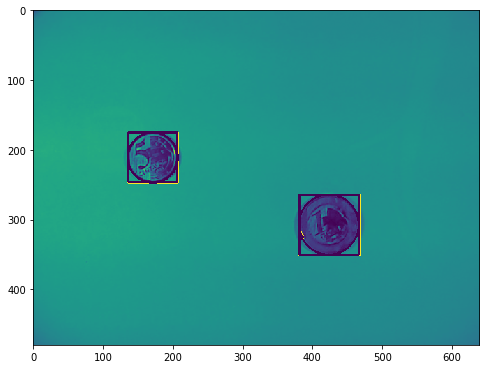

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math

img = cv.imread("moedas_105.jpg");
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)

img_bin = img.copy()
for lin in range(img.shape[0]):
  for col in range(img.shape[1]):
    if(img.item(lin,col) > 50):
      img_bin.itemset((lin,col),0)
    else:
      img_bin.itemset((lin,col),255)

#Extrair os contornos da imagem
contorno, ordem = cv.findContours(img_bin, cv.RETR_EXTERNAL,cv.CHAIN_APPROX_SIMPLE)
raio_list = []

for c in contorno:
  #Encontrar o bounding box
  x,y,w,h = cv.boundingRect(c)
  cv.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

  #Encontrar o bounding box considerando a rotação do objeto
  area = cv.minAreaRect(c)
  box = cv.boxPoints(area)  # calcular as coordenadas do obj
  box = np.int0(box)        # normalizar as coordenadas -> inteiros
  cv.drawContours(img,[box],0,(0,0,255),2)

  #Encontrar o Círculo Mínimo
  (x,y), raio = cv.minEnclosingCircle(c)
  centro = (int(x),int(y))  # cast para inteiro
  raio = int(raio)          # cast para inteiro
  cv.circle(img,centro,raio,(0,255,0),2)
  if(raio > 30):
    raio_list.append(raio)
  #print(raio_list)
  #area1 = 3.14 * (raio_list[0]**2)
  #area2 = 3.14 * (raio_list[1]2)

  #print(area1)
  #print(area2)

print(raio_list)
area1 = 3.14 * (raio_list[0]**2)
area2 = 3.14 * (raio_list[1]**2)

print(area1)
print(area2)

plt.figure(figsize=(8,8))
plt.imshow(img)